# Random Forest Regression with scikit-learn
_A comprehensive tutorial using the California Housing dataset_

Author: Shrey Nayak

---

## Objectives:
- Understand the theory behind Random Forest Regression.
- Learn how to implement it using `scikit-learn`.
- Compare it with a single Decision Tree.
- Perform hyperparameter tuning.
- Interpret feature importance.


## 1. Introduction to Random Forest Regression

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve prediction performance.

**Key idea:**
- Train multiple **decision trees** on random subsets of the data.
- Combine their predictions by averaging (for regression) or majority voting (for classification).

**Why it works:**
- Individual decision trees are prone to overfitting (high variance).
- By averaging many trees, the variance is reduced without a huge increase in bias.

---

### Advantages
- Handles both numerical and categorical features.
- Works well without heavy parameter tuning.
- Robust to noise and outliers.
- Can estimate **feature importance**.

### Disadvantages
- Less interpretable than a single decision tree.
- Can be computationally expensive for very large datasets.

---

## 2. How Random Forest Works (Step-by-Step)
1. Draw `n_estimators` bootstrap samples from the training data.
2. Train a **Decision Tree Regressor** on each bootstrap sample.
3. At each split in the tree, consider only a random subset of features (`max_features`).
4. Predict by averaging the predictions from all trees.

---

## 3. `RandomForestRegressor` in scikit-learn
Key parameters:
- `n_estimators`: Number of trees in the forest.
- `max_features`: Number of features to consider at each split.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split` / `min_samples_leaf`: Minimum samples required to split a node or be a leaf.
- `n_jobs`: Number of CPU cores to use (-1 for all).
- `random_state`: For reproducibility.



In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn modules
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min   

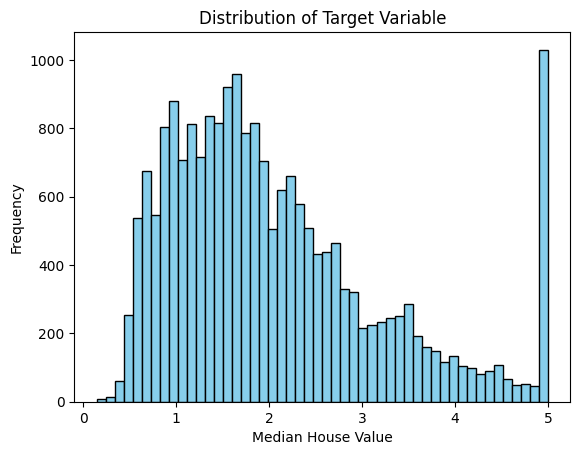

In [3]:
# Dataset shape
print("Dataset shape:", df.shape)

# Quick statistical summary
print(df.describe())

# Missing values check
print("Missing values:\n", df.isnull().sum())

# Target variable distribution
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()


In [4]:
# Separate features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling is optional for tree-based models, but we can keep it for demonstration
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")


Random Forest RMSE: 0.506
Random Forest R² Score: 0.805


In [6]:
# Train single Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")


Decision Tree RMSE: 0.706, R²: 0.620
Random Forest RMSE: 0.506, R²: 0.805


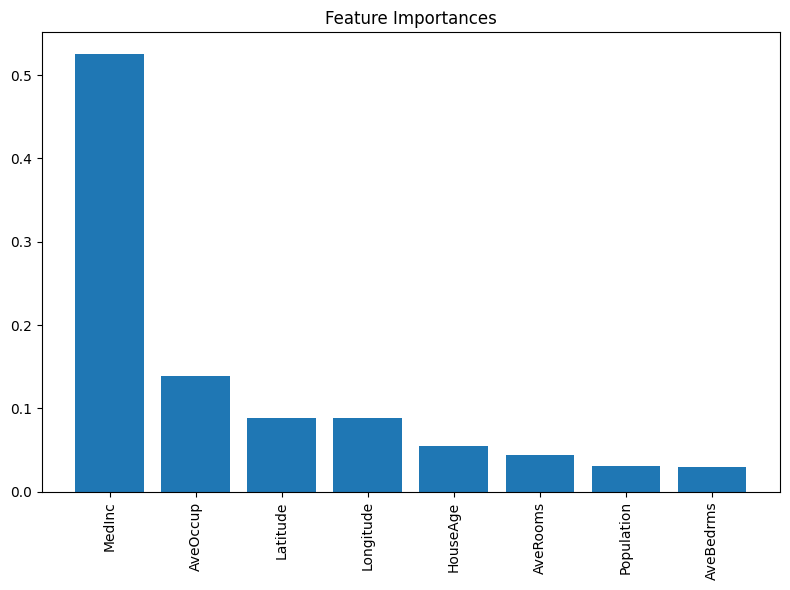

In [7]:
# Feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(8,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [8]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 0.8]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/base.py", li

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best R² Score: 0.8086502812766727


## Conclusion

- Random Forest Regression outperformed a single Decision Tree on our dataset.
- It reduced overfitting by averaging predictions across many trees.
- Feature importance analysis showed which variables were most influential.
- Hyperparameter tuning can further improve performance.

**Advantages:**
- High accuracy.
- Works well without feature scaling.
- Can handle large datasets.

**Limitations:**
- Less interpretable than simple models.
- Can be computationally expensive.

**Next Steps:**
- Try different datasets and compare results.
- Experiment with extreme values of `n_estimators` and `max_depth`.
- Compare with boosting methods like Gradient Boosting and XGBoost.
